In [52]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\larac\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
pip install paho-mqtt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\larac\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\larac\AppData\Local\Temp\ipykernel_22296\3140593766.py:8: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


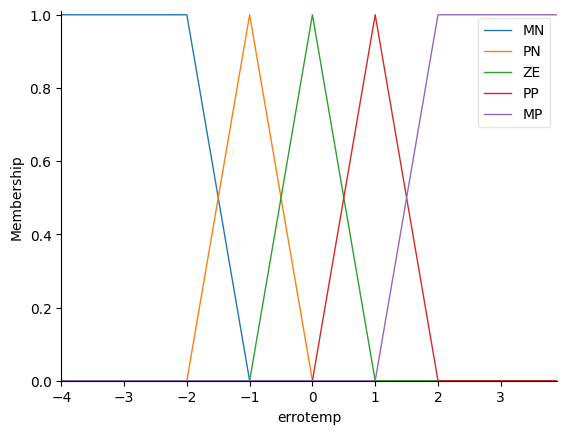

In [54]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

mqttBroker ="test.mosquitto.org"
client = mqtt.Client()
client.connect(mqttBroker)

# New Antecedent/Consequent objects hold universe variables and membership
# functions
errotemp = ctrl.Antecedent(np.arange(-4, 4, 0.1), 'errotemp')
varerrotemp =ctrl.Antecedent(np.arange(-1, 1, 0.01), 'varerrotemp')
aquecedor =ctrl.Consequent(np.arange(0, 100, 1), 'aquecedor')


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-4, -4, -2,-1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-2,-1,0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-1, 0, 1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 1, 2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[1, 2, 4, 4])
# You can see how these look with .view()
errotemp.view()

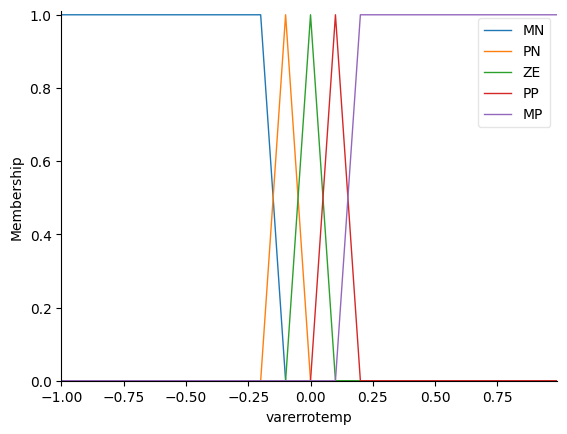

In [55]:
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-1, -1, -0.2,-0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 1, 1])
# You can see how these look with .view()
varerrotemp.view()

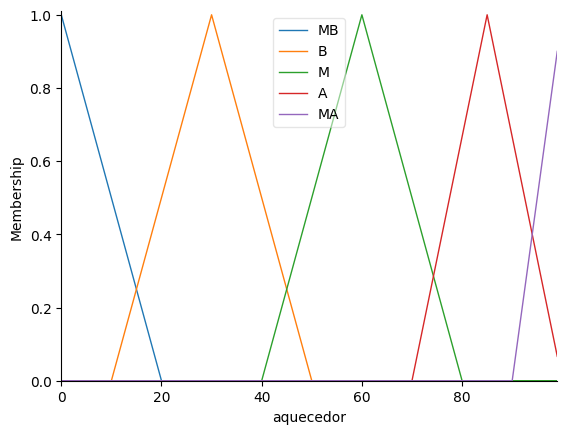

In [56]:
aquecedor['MB'] = fuzz.trimf(aquecedor.universe, [0, 0, 20])
aquecedor['B'] = fuzz.trimf(aquecedor.universe, [10, 30, 50])
aquecedor['M'] = fuzz.trimf(aquecedor.universe, [40, 60, 80])
aquecedor['A'] = fuzz.trimf(aquecedor.universe, [70, 85, 100])
aquecedor['MA'] = fuzz.trimf(aquecedor.universe, [90, 100, 100])
aquecedor.view()

In [57]:
regra1 = ctrl.Rule(errotemp['MN'] & varerrotemp['MN'], aquecedor['MB'])
regra2 = ctrl.Rule(errotemp['PN'] & varerrotemp['MN'], aquecedor['B'])
regra3 = ctrl.Rule(errotemp['ZE'] & varerrotemp['MN'], aquecedor['M'])
regra4 = ctrl.Rule(errotemp['PP'] & varerrotemp['MN'], aquecedor['A'])
regra5 = ctrl.Rule(errotemp['MP'] & varerrotemp['MN'], aquecedor['MA'])
regra6 = ctrl.Rule(errotemp['MN'] & varerrotemp['PN'], aquecedor['MB'])
regra7 = ctrl.Rule(errotemp['PN'] & varerrotemp['PN'], aquecedor['B'])
regra8 = ctrl.Rule(errotemp['ZE'] & varerrotemp['PN'], aquecedor['M'])
regra9 = ctrl.Rule(errotemp['PP'] & varerrotemp['PN'], aquecedor['A'])
regra10 = ctrl.Rule(errotemp['MP'] & varerrotemp['PN'], aquecedor['MA'])
regra11 = ctrl.Rule(errotemp['MN'] & varerrotemp['ZE'], aquecedor['B'])
regra12 = ctrl.Rule(errotemp['PN'] & varerrotemp['ZE'], aquecedor['M'])
regra13 = ctrl.Rule(errotemp['ZE'] & varerrotemp['ZE'], aquecedor['M'])
regra14 = ctrl.Rule(errotemp['PP'] & varerrotemp['ZE'], aquecedor['A'])
regra15 = ctrl.Rule(errotemp['MP'] & varerrotemp['ZE'], aquecedor['MA'])
regra16 = ctrl.Rule(errotemp['MN'] & varerrotemp['PP'], aquecedor['M'])
regra17 = ctrl.Rule(errotemp['PN'] & varerrotemp['PP'], aquecedor['A'])
regra18 = ctrl.Rule(errotemp['ZE'] & varerrotemp['PP'], aquecedor['A'])
regra19 = ctrl.Rule(errotemp['PP'] & varerrotemp['PP'], aquecedor['MA'])
regra20 = ctrl.Rule(errotemp['MP'] & varerrotemp['PP'], aquecedor['MA'])
regra21 = ctrl.Rule(errotemp['MN'] & varerrotemp['MP'], aquecedor['A'])
regra22 = ctrl.Rule(errotemp['PN'] & varerrotemp['MP'], aquecedor['A'])
regra23 = ctrl.Rule(errotemp['ZE'] & varerrotemp['MP'], aquecedor['MA'])
regra24 = ctrl.Rule(errotemp['PP'] & varerrotemp['MP'], aquecedor['MA'])
regra25 = ctrl.Rule(errotemp['MP'] & varerrotemp['MP'], aquecedor['MA'])

In [58]:
aquecedor_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25])

potencia = ctrl.ControlSystemSimulation(aquecedor_ctrl)

In [ ]:
sp=22
tempatual=18
print(tempatual)
erroatual=-4
while True:
  erroanterior=erroatual
  erroatual=tempatual-sp
  varerroTemp=erroatual-erroanterior
  potencia.input['errotemp'] =erroatual
  potencia.input['varerrotemp'] =varerroTemp
  potencia.compute()
  i=0
  while (i < 10):
    tempatual=tempatual * 0.9954 + potencia.output['aquecedor'] * 0.001963
    time.sleep(0.1)
    i += 1
  print(tempatual)
  client.publish("Aquecedor/Temperatura", tempatual)
  client.publish("Aquecedor/erro", erroatual)

18
18.237851479776626
18.237851479776626
19.56050839106248
19.56050839106248
20.856948977049495
20.856948977049495
22.12767962168674
22.12767962168674
23.591845114953692
23.591845114953692
25.021851007514073
25.021851007514073
26.428705821653015
26.428705821653015
27.807675427510805
27.807675427510805
29.15931253659191
29.15931253659191
30.484158905130016
30.484158905130016
31.782745551232004
31.782745551232004
33.05559296771787
33.05559296771787
34.303211330742
34.303211330742
35.5261007042793
35.5261007042793
36.72475124055837
36.72475124055837
37.89964337652168
37.89964337652168
39.05124802639192
39.05124802639192
40.180026770421385
40.180026770421385
41.28643203990022
41.28643203990022
42.37090729849753
42.37090729849753
43.43388722000829
43.43388722000829
44.475797862577046
44.475797862577046
45.4970568394683
45.4970568394683
46.498073486452164
46.498073486452164
47.47924902587218
47.47924902587218


KeyboardInterrupt: 